# MODULES


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import datasets
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chisquare


## TODO - Bonferroni Corrections

The chance of capturing rare event increases when testing multiple hypothesis. It means the likelihood of incorrectly rejecting a null hypothesis (false positive) increases. 

The Bonferroni correction rejects the null hypothesis for each $p_{i} \leq \frac {\alpha}{m}$. This ensures the [Family Wise Error Rate](https://en.wikipedia.org/wiki/Family-wise_error_rate) stays below the significance level $\alpha$. More information can be found [here](https://stats.stackexchange.com/questions/153122/bonferroni-correction-for-post-hoc-analysis-in-anova-regression).

It is useful for post-hoc tests after performing one-way ANOVA or Chi-Square tests (explained in the next chapters) that reject the null hypothesis. When comparing $N$ multiple groups, we can either do:
+ pairwise testing. In that case, $m$ will be ${N \choose 2}$.
+ one vs the rest. In that case, $m$ will be $N$.

___

# INDEPENDENT TWO-SAMPLES T-TEST
## Assumptions

As for one-sample t-tests, the assumptions or normality must be met:
+ the populations are normally distributed, OR
+ the samples are large, regardless of the underlying distribution of data, thanks to the CLT.


## Test Parameters

The null hypothesis $H_0$ states that the population mean of two samples are equal: $\mu_1 = \mu_2$. 

The test statistic is $t=(\bar {X_1}-\bar {X_2}) / s$, where $\bar {X_1}$ and $\bar {X_2}$ are the sample means and $s^2$ is a measure of common variance (its exact formula depends on whether the two samples have equal size and/or variance).

Under the null hypothesis, the test statistic follows a $t$-distribution (its degrees of freedom depend on the assumptions of equal or unequal variance). 

*Note: Student's t-test assume equality of variance; the Welch's unequal variances t-test, or Welch U test, doesn't make such assumptions. The litterature [does not recommend](https://onlinelibrary.wiley.com/doi/abs/10.1348/000711004849222) to test equality of variances before choosing between the two test. In general, using the Welch U test must be [preferred](https://www.rips-irsp.com/articles/10.5334/irsp.82/).*

*Note (mathematical intuition): The independent two-samples t-test assumes that both sampling distribution of sample means follow a normal distribution. The sum of two normally distributed variables also follows a normal distribution, which leads to the mathematical proof that the test statistic follows a $t$-distribution.*


## Example

Let's imagine that we want to compare the daily production of two plants over 10 days.


### Assumptions of Normality

The sample size is very small, so we need to check the assumption of normality before performing the t-test. We reject the null hypothesis of normality if the p-value is below $\alpha = 0.05$. 


### Hypothesis

We will perform a t-test with the following parameters:
+ our null hypothesis states that the population means are equal: $\mu_1 = \mu_2$. 
+ our alternate hypothesis states that $\mu_1 \neq \mu_2$ (two-sided t-test).
+ we set the signifance level $\alpha = 0.05$.

We will reject the null hypothesis if the p-value is below $\alpha$. 


In [70]:
# comparing the prod distribution of two plants using the
# number of cars produced over the same 10 days
cars_plant1 = [1243, 1240, 1165, 1210, 1326, 1162, 1019, 1288, 1337, 1166]
cars_plant2 = [1099,  972, 1130, 1305,  953,  1062, 1316, 1153,  906, 1109]

# sample means
print('mean production: plant1 = {:.0f} - plant2 = {:.0f}'.format(np.mean(cars_plant1), np.mean(cars_plant2)))

# test for normality
_, plant1_norm_p = stats.shapiro(cars_plant1)
_, plant2_norm_p = stats.shapiro(cars_plant2)

print('p-values for normality: plant1 = {:.3f} - plant2 = {:.3f}'.format(plant1_norm_p, plant2_norm_p))

# two-sided t-test
t_stat, t_p = stats.ttest_ind(cars_plant1, cars_plant2, equal_var=False)
print('p-value of t-test: {:0.5f}'.format(t_p))


mean production: plant1 = 1216 - plant2 = 1100
p-values for normality: plant1 = 0.482 - plant2 = 0.520
p-value of t-test: 0.04412


___

# ANOVA

The ANalysis Of VAriance ([ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)) tests are an extension of t-tests when dealing with more than two samples.

+ one-way ANOVA null hypothesis: the means of three or more populations are equal _(see example [here](https://en.wikipedia.org/wiki/One-way_analysis_of_variance#Example))._
+ repeated measures ANOVA null hypothesis: the average difference between in-sample values is null.

## Assumptions

ANOVA is mathematically a [generalized linear model (GLM)](https://pythonfordatascience.org/anova-python/), where the factors of all the categorical variables have been one-encoded. In particular, factorial ANOVA include interaction terms between categorical factors and should therefore be interpreted like traditional linear models.

ANOVA being a GLM, assumptions are the same as for linear regression:

+ Normality.
+ Homogeneity of variance.
+ Independent observations.

_Note: If group sizes are equal, the F-statistic is robust to violations of normality and homogeneity of variance._

## F-distribution

In an ANOVA, the test statistic follows an **F-distribution** under the null hypothesis.

The [F-Distribution](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Continous-Random-Variables/F-Distribution/index.html) has two numbers of degrees of freedom: the denominator (sample size) and numerator (number of samples). 


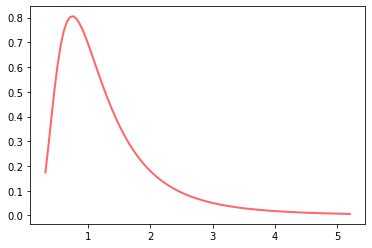

In [71]:
# degrees of freedom
dfn, dfd = 30, 8

# 100 x points between the first and 99th percentile of the f-distribution & corresponding f values
x = np.linspace(stats.f.ppf(0.01, dfn, dfd), stats.f.ppf(0.99, dfn, dfd), 100)
y = stats.f.pdf(x, dfn, dfd)

# plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')
plt.show()


## F-value

ANOVA compares two types of variance:

+ between groups: how far group means stray from the total mean
+ within groups: how far individual values stray from their respective group mean

The **F-value** is the variance between groups divided by the variance within groups, where:

+ the variance between groups equals the sum of squares group divided by the degrees of freedom (groups)
+ the variance within groups equals the sum of squares errors divided by the degrees of freedom (error)

The groups belong to the **same population** if the **variance between groups** (numerator) is **small** compared to the **variance within groups** (denominator).

## One-way ANOVA

In [ ]:
# example: number of days each customer took to pay an invoice based on a percentage of discount if early payment
discount_0perc = [14, 11, 18, 16, 21]
discount_1perc = [21, 15, 23, 10, 16]
discount_2perc = [11, 16,  9, 14, 10]

stats.f_oneway(discount_0perc, discount_1perc, discount_2perc) # p-value > 0.05, the discounts make no significant difference


## Two-way ANOVA

The **two-way ANOVA** is an extension of the one-way ANOVA to test **two independant variables** at the same time, taking interactions between these variables into account. 

_Note: this can be further generalized to N-way ANOVA._


In [ ]:
# data - same as before, but checking if the amount has an impact
df = pd.DataFrame({
    'discount': ['2p','2p','2p','2p','2p','1p','1p','1p','1p','1p','0p','0p','0p','0p','0p'],
    'amount': [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250],
    'days': [16,14,11,10,9,23,21,16,15,10,21,16,18,14,11]
})

# fit without interaction factor
model = ols('days ~ C(discount) + C(amount)', df).fit()

# discount has now become significant
sm.api.stats.anova_lm(model, typ=2)

# model.summary()


In [ ]:
# data - three fertilizers, warm vs cold, size of plant
df = pd.DataFrame({
    'fertilizer': ['A','A','A','A','A','A','B','B','B','B','B','B','C','C','C','C','C','C'],
    'temperature': ['W','W','W','C','C','C','W','W','W','C','C','C','W','W','W','C','C','C'],
    'size': [13,14,12,16,18,17,21,19,17,14,11,14,18,15,15,15,13,8]
})

# fit with interaction factor
model = ols('size ~ C(fertilizer) * C(temperature)', df).fit()

# discount has now become significant
sm.api.stats.anova_lm(model, typ=2)

# model.summary()


Note on `model.summary()`:
+ Durban-Watson detects the presence of autocorrelation.
+ Jarque-Bera tests the assumption of normality.
+ Omnibus tests the assumption of homogeneity of variance.
+ Condition Number assess multicollinearity (should be < 20).